In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import cluster
#pd.options.display.max_rows = 999
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.expand_frame_repr', False)
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import time

In [2]:
listings = gpd.GeoDataFrame.from_file('Data/NYClisting.geojson')

In [3]:
listings.head(3)

,Median_income,Median_rent,accesstosubway,availability_365,beer_count,boro_ct_2010,calculated_host_listings_count,coffee_count,connectivityScore,geometry,host_id,host_name,id,index_left,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type
0,21855,1287,8.368050,242,0,2002400,10,0,0.0,POINT (-73.86406089014145 40.81274651012037),525710,Libby,14880182,1.0,2017-02-08,40.812747,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room
1,21855,1287,8.380864,365,0,2000200,10,0,0.0,POINT (-73.86381389361847 40.81293405229447),525710,Libby,15359150,1.0,2017-02-10,40.812934,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room
2,21855,1287,8.406552,336,0,2000200,10,0,0.0,POINT (-73.86370502873359 40.81359965937455),525710,Libby,15359306,1.0,2017-01-09,40.813600,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room


In [4]:
listings.columns.tolist()

['Median_income',
 'Median_rent',
 'accesstosubway',
 'availability_365',
 'beer_count',
 'boro_ct_2010',
 'calculated_host_listings_count',
 'coffee_count',
 'connectivityScore',
 'geometry',
 'host_id',
 'host_name',
 'id',
 'index_left',
 'last_review',
 'latitude',
 'longitude',
 'minimum_nights',
 'name',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'room_type']

In [35]:
col = [u'Median_income',
     u'Median_rent',
     #u'accesstosubway',
     u'availability_365',
     u'beer_count',
     #u'boro_ct_2010',
     #u'calculated_host_listings_count',
     u'coffee_count',
     u'connectivityScore',
     #'geometry',
     #u'host_id',
     #u'host_name',
     #u'id',
     #u'index_left',
     #u'last_review',
     #u'latitude',
     #u'longitude',
     u'minimum_nights',
     #u'name',
     #u'neighbourhood',
     #u'neighbourhood_group',
     u'number_of_reviews',
     u'price',
     u'reviews_per_month',
     u'room_type']

In [36]:
listings[col].head(3)

,Median_income,Median_rent,availability_365,beer_count,coffee_count,connectivityScore,minimum_nights,neighbourhood,number_of_reviews,price,reviews_per_month,room_type
0,21855,1287,242,0,0,0.0,2,Clason Point,9,59,1.53,Private room
1,21855,1287,365,0,0,0.0,2,Clason Point,2,43,0.42,Private room
2,21855,1287,336,0,0,0.0,1,Clason Point,6,76,1.37,Private room


In [7]:
listings[col].dtypes

Median_income         object
Median_rent           object
availability_365       int64
beer_count             int64
coffee_count           int64
connectivityScore    float64
minimum_nights         int64
number_of_reviews      int64
price                  int64
reviews_per_month    float64
room_type             object
dtype: object

In [4]:
listings.Median_income = pd.to_numeric(listings.Median_income, errors='coerce')
listings.Median_rent = pd.to_numeric(listings.Median_rent, errors='coerce')

KeyboardInterrupt: 

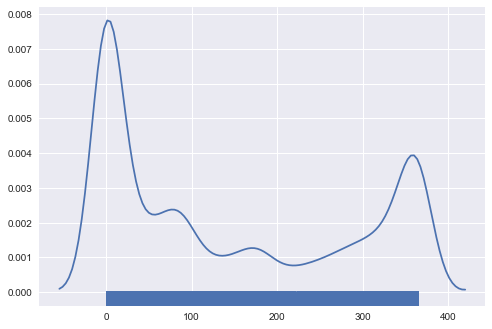

In [5]:
sns.distplot(listings.availability_365, hist=False, rug=True)

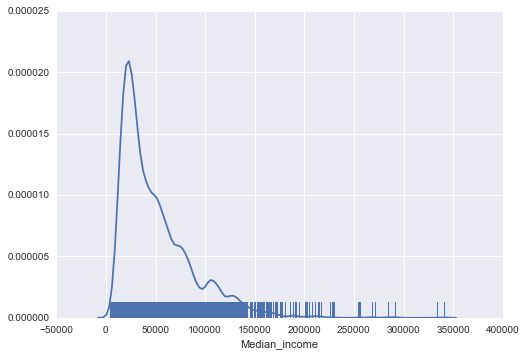

In [10]:
sns.distplot(listings.Median_income, hist=False, rug=True)

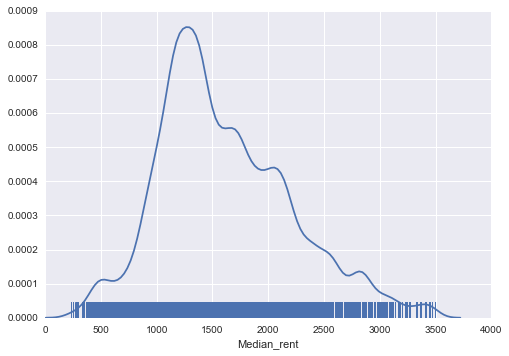

In [11]:
sns.distplot(listings.Median_rent, hist=False, rug=True)

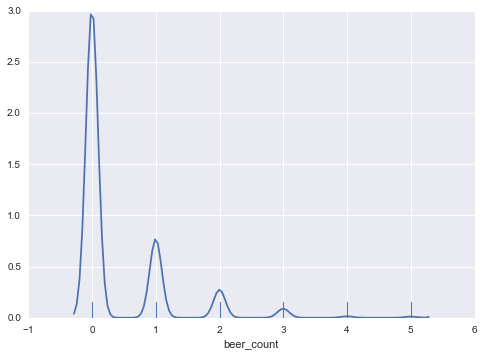

In [12]:
sns.distplot(listings.beer_count, hist=False, rug=True)

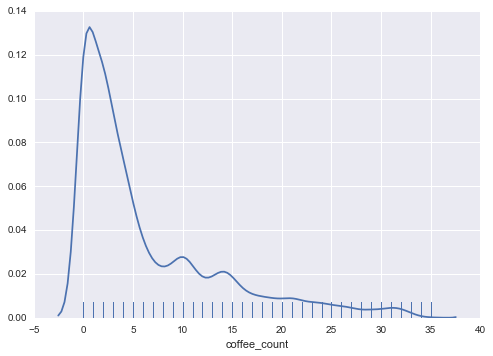

In [13]:
sns.distplot(listings.coffee_count, hist=False, rug=True)

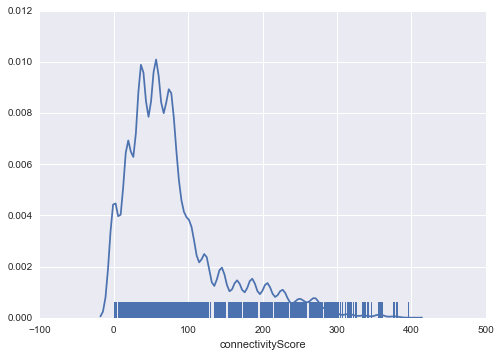

In [14]:
sns.distplot(listings.connectivityScore, hist=False, rug=True)

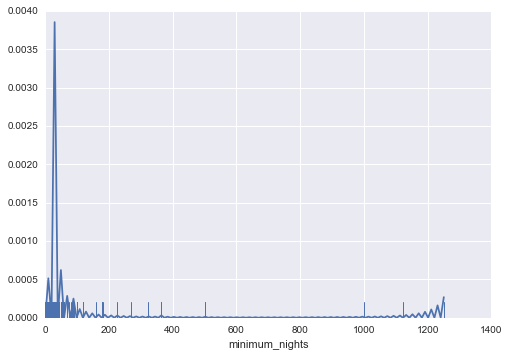

In [15]:
sns.distplot(listings.minimum_nights, hist=False, rug=True)

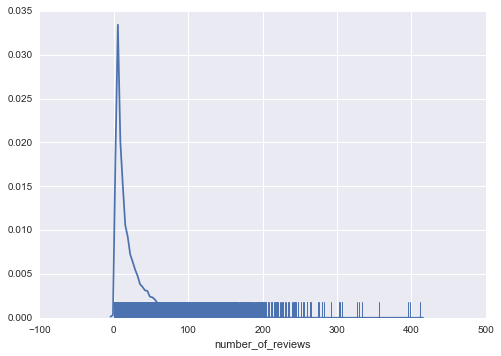

In [16]:
sns.distplot(listings.number_of_reviews, hist=False, rug=True)

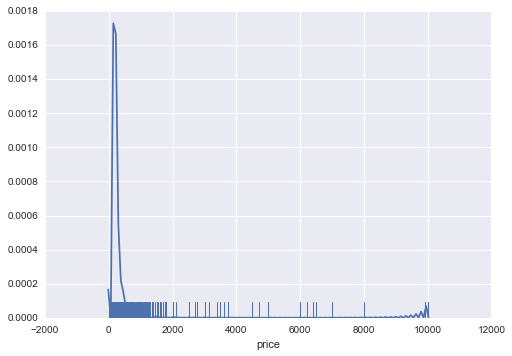

In [17]:
sns.distplot(listings.price, hist=False, rug=True)

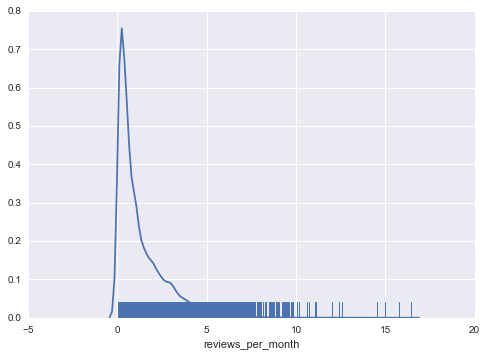

In [18]:
sns.distplot(listings.reviews_per_month, hist=False, rug=True)

In [10]:
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

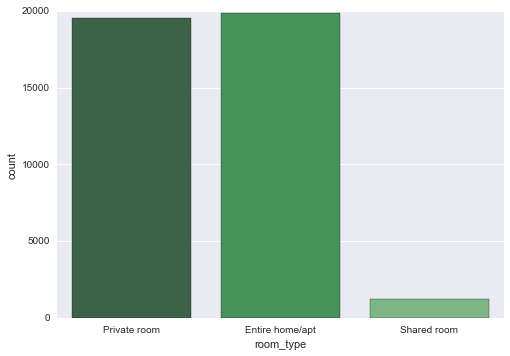

In [20]:
sns.countplot(x=listings.room_type, data=listings, palette="Greens_d");

In [6]:
listings['Private_room'] = 0
listings['Entire_home/apt'] = 0
listings['Shared_room'] = 0

In [7]:
def private(roomtype):
    if roomtype=='Private room':
        return 1
    else:
        return 0
def entire(roomtype):
    if roomtype=='Entire home/apt':
        return 1
    else:
        return 0
def shared(roomtype):
    if roomtype=='Shared room':
        return 1
    else:
        return 0

In [8]:
listings['Private_room'] = listings.room_type.map(private)
listings['Entire_home/apt'] = listings.room_type.map(entire)
listings['Shared_room'] = listings.room_type.map(shared)

### Feature selection 

In [9]:
features = list(listings.columns)

In [115]:
features =[#u'Median_income',
     u'Median_rent',
     #u'accesstosubway',
     #u'availability_365',
     u'beer_count',
     #u'boro_ct_2010',
     #u'calculated_host_listings_count',
     u'coffee_count',
     u'connectivityScore',
     #'geometry',
     #u'host_id',
     #u'host_name',
     #u'id',
     #u'index_left',
     #u'last_review',
     #u'latitude',
     #u'longitude',
     #u'minimum_nights',
     #u'name',
     #u'neighbourhood',
     #u'neighbourhood_group',
     #u'number_of_reviews',
     u'price',
     u'reviews_per_month',
     #u'room_type',
     'Private_room',
     'Entire_home/apt',
     'Shared_room'
          ]
features

['Median_rent',
 'beer_count',
 'coffee_count',
 'connectivityScore',
 'price',
 'reviews_per_month',
 'Private_room',
 'Entire_home/apt',
 'Shared_room']

### Clean Nan Values

In [116]:
len(listings)

40586

In [117]:
listings[features].isnull().any(axis=1).sum()

10330

In [118]:
reduced = listings[listings[features].isnull().any(axis=1)==False]

In [119]:
len(reduced)

30256

In [120]:
reduced[features].isnull().any(axis=1).sum()

0

In [121]:
reduced.head(3)

,Median_income,Median_rent,accesstosubway,availability_365,beer_count,boro_ct_2010,calculated_host_listings_count,coffee_count,connectivityScore,geometry,host_id,host_name,id,index_left,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type,Private_room,Entire_home/apt,Shared_room
0,21855.0,1287.0,8.368050,242,0,2002400,10,0,0.0,POINT (-73.86406089014145 40.81274651012037),525710,Libby,14880182,1.0,2017-02-08,40.812747,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room,1,0,0
1,21855.0,1287.0,8.380864,365,0,2000200,10,0,0.0,POINT (-73.86381389361847 40.81293405229447),525710,Libby,15359150,1.0,2017-02-10,40.812934,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room,1,0,0
2,21855.0,1287.0,8.406552,336,0,2000200,10,0,0.0,POINT (-73.86370502873359 40.81359965937455),525710,Libby,15359306,1.0,2017-01-09,40.813600,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room,1,0,0


In [ ]:
with open('Data/CleanNYClistings.geojson', 'w') as f:
    f.write(reduced.to_json())

### Sample Selection

In [27]:
# Per neighborhood
sample = reduced[reduced.neighbourhood == 'Crown Heights']

In [127]:
# Citywide
sample = reduced.sample(10000, random_state=123)

In [131]:
# Everything
sample = reduced

In [132]:
X = sample[features]

In [133]:
len(X)

30256

In [125]:
X.head(3)

,Median_rent,beer_count,coffee_count,connectivityScore,price,reviews_per_month,Private_room,Entire_home/apt,Shared_room
7910,981.0,0,0,39.0,129,7.02,0,1,0
17310,534.0,0,4,19.0,84,2.35,1,0,0
9462,1306.0,0,2,76.0,50,0.07,1,0,0


### Clustering

In [52]:
def kmeans_clusters(n):
    start_time = time.time()

    Xspec = KMeans(n_clusters = n)
    cl=Xspec.fit(X).labels_
    sample['kmeans'] = cl

    result2 = [str(x) for x in cl.tolist()]
    sample['kmeansCat'] = result2
    
    sns.countplot(x=sample['kmeansCat'], data=sample, palette="Greens_d");
    
    print("--- %s seconds ---" % (time.time() - start_time))

/Users/pichot/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pichot/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 1.4156651496887207 seconds ---


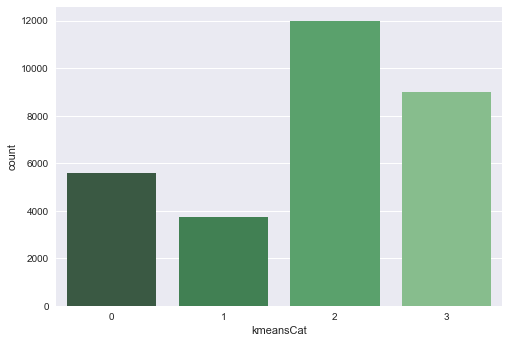

In [135]:
kmeans_clusters(4)

In [46]:
def agg_clusters(n):
    start_time = time.time()

    Xspec = AgglomerativeClustering(n_clusters = n)
    cl=Xspec.fit(X).labels_
    sample['agglomerative'] = cl

    result2 = [str(x) for x in cl.tolist()]
    sample['agglomerativeCat'] = result2
    
    sns.countplot(x=sample['agglomerativeCat'], data=sample, palette="Greens_d");
    
    print("--- %s seconds ---" % (time.time() - start_time))

/Users/pichot/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pichot/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 0.5782768726348877 seconds ---


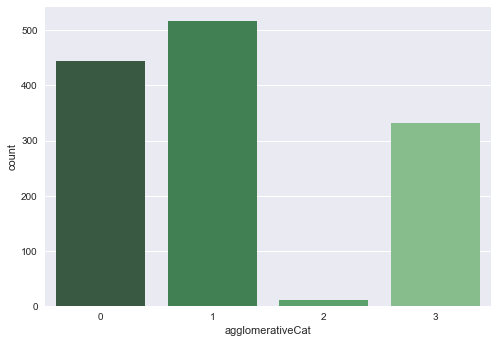

In [50]:
agg_clusters(4)

In [60]:
sample.groupby(sample.kmeansCat).count()

,Median_income,Median_rent,accesstosubway,availability_365,beer_count,boro_ct_2010,calculated_host_listings_count,coffee_count,connectivityScore,geometry,host_id,host_name,id,index_left,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type,Private_room,Entire_home/apt,Shared_room,agglomerative,agglomerativeCat,kmeans
kmeansCat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,415,415,415,415,415,415,415,415,415,415,415,414,415,415,355,415,415,415,415,415,415,415,415,355,415,415,415,415,415,415,415
1,287,287,287,287,287,287,287,287,287,287,287,287,287,287,242,287,287,287,287,287,287,287,287,242,287,287,287,287,287,287,287
2,24,24,24,24,24,24,24,24,24,24,24,24,24,24,15,24,24,24,24,24,24,24,24,15,24,24,24,24,24,24,24
3,577,577,577,577,577,577,577,577,577,577,577,576,577,577,400,577,577,577,577,577,577,577,577,400,577,577,577,577,577,577,577


In [61]:
colors = {0:'red', 1:'blue', 2:'green', 3:'purple', 4: 'orange'}

In [64]:
set(sample['kmeans'])

{0, 1, 2, 3}

In [67]:
def cluster_map(classifier):
    f, ax = plt.subplots(figsize=(15,15))
    
    for cid in set(sample[classifier]):
        sample[sample[classifier] == cid].plot(color=colors[cid], legend=True, ax = ax, markersize=4)

    plt.xlabel('longitude')
    plt.ylabel('latitude')
    ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.title("NYC Airbnb {0}".format(classifier), size=20)

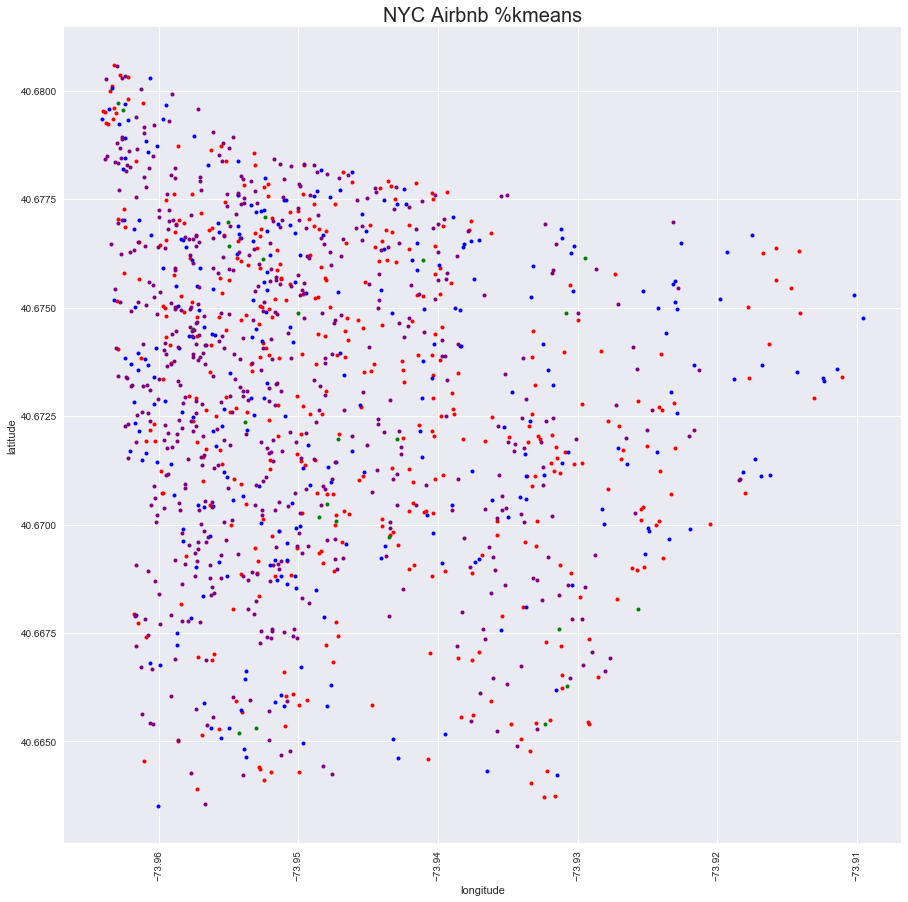

In [66]:
cluster_map('kmeans')

In [80]:
def feature_dist(feature, classifier):
    for cid in set(sample[classifier]):
        sns.distplot(sample[sample[classifier] == cid][feature], hist=True, rug=True, label=str(cid))

    plt.legend()

/Users/pichot/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/pichot/.pyenv/versions/3.5.2/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


TypeError: len() of unsized object

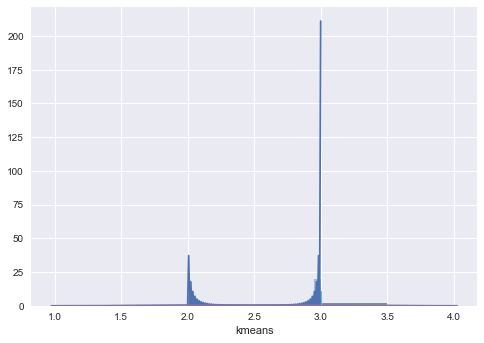

In [79]:
feature_dist('kmeans', 'availability_365')